# Plotting an annual cycle

Many times we have the need to see all 12 months that an annual cycle has for a variable. So we have implemented a function that will plot any range of months we want. Let's import obrero:

In [2]:
# small hack to be able to import module without install
import os
import sys
sys.path.append(os.getcwd() + '/../')

import obrero

In this case we want to plot sea-ice cover (SIC), which changes every month. So let's read the data:

In [4]:
# file name
f1 = 'data/sic.nc'
f2 = 'data/lsm.nc'

# read as data array
da = obrero.read_nc(f1, 'sic')
lm = obrero.read_nc(f2, 'lsm')

And now we get the mean annual cycle, i.e. the climatology for this data array:

In [3]:
# obtain the mean for every month
ac = obrero.get_climatology(da)

And since we are dealing with 'sea'-ice, we will remove all land:

In [6]:
# mask out land values
oac = obrero.mask_land_ocean(ac, lm, ocean=True)

Let's plot seasonality. To do this we need to remove the annual mean values:

In [7]:
# mean in time
mn = da.mean(dim='time', keep_attrs=True)

# seasonality
sn = oac - mn

To plot we use function `plot_ancy()` which requires an argument that is the months the user wants to plot. It can be a single month or a set of them. January is 1 and December is 12. So to plot all months we use a `range()`:

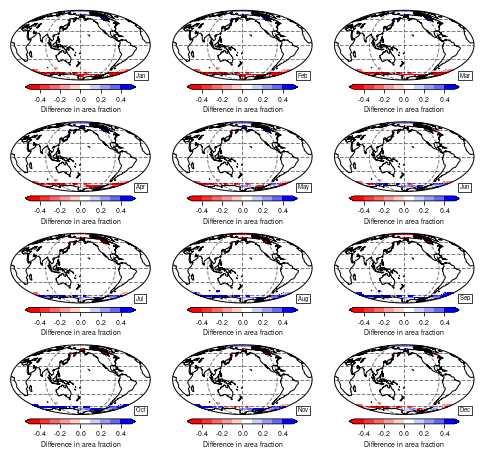

In [9]:
%matplotlib inline

# specifications for plot_global_contour
spec = dict(method='mesh', cbstring=r'Difference in area fraction', minv=-0.5,
            maxv=0.5, nlevels=11, cm='bwr_r', lon0=180, extend='both')

# plot
fig = obrero.plot_ancy(sn, spec, range(1, 12 + 1), 174, 160)

Notice this function nicely adds a text box in the lower right corner with the name of the month. The user can choose whether these names are full-names or abbreviations of three or one letter using the keyword `names`, which has options 'F', '3L' and '1L' respectively. Other options such as sizing and saving are similar to the ones that `panel_global_contour()` has.